# Gradient Descent using Numpy

Import the necessary libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Define the gradient descent function along with the specific equations

1. **Gradient Descent Update Rules for Linear Regression**:
   - The hypothesis function is defined as:
     $$
     y_\theta(x) = mx + b
     $$

   - The cost function (mean squared error) can be written as:
     $$
     J(m, b) = \frac{1}{m} \sum_{i=1}^{n} \left( y_i - (mx_i + b) \right)^2
     $$

   - The gradients with respect to \(m\) and \(b\) are:
     $$
     \frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i \left( y_i - (mx_i + b) \right)
     $$
     $$
     \frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - (mx_i + b) \right)
     $$

2. **Gradient Descent Update Steps**:
   - The update steps for the parameters \(m\) and \(b\) are given by:
     $$
     m := m - \alpha \frac{\partial J}{\partial m}
     $$
     $$
     b := b - \alpha \frac{\partial J}{\partial b}
     $$

Where:
- \(y_i\) is the actual output.
- \(x_i\) is the input feature.
- \(\alpha\) is the learning rate.


Define the gradient descent function and fix appropriate values for the hyperparameters

In [86]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

Text(0, 0.5, 'y')

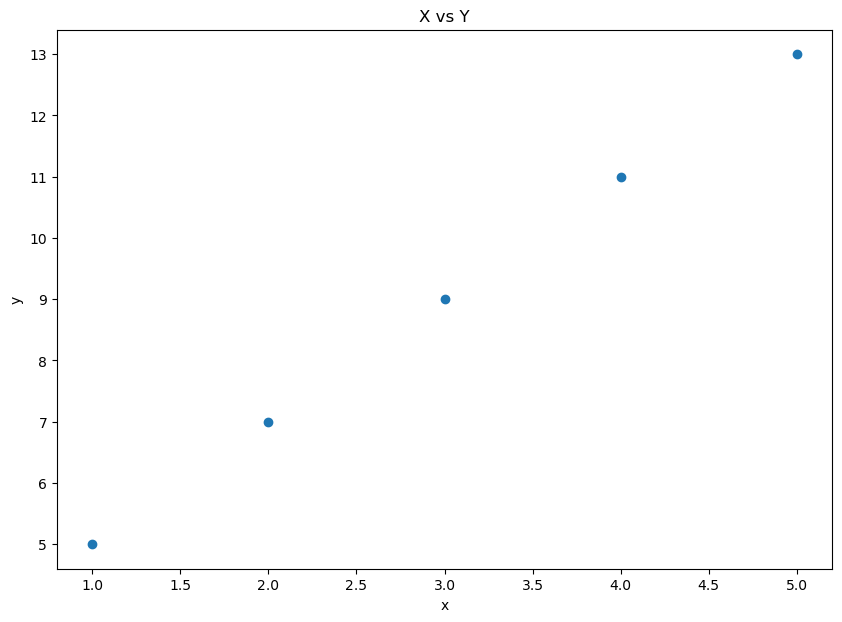

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.title('X vs Y')
plt.xlabel('x')
plt.ylabel('y')

In [94]:
#using an iterative process
def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    lr = 0.01
    iterations = 1000
    
    for i in range(iterations):
        cost_function = np.sum(y-(m_curr*x + b_curr))/n
        d_dm = np.sum((-2/n)*x*(y-(m_curr*x + b_curr)))
        d_db = np.sum((-2/n)*(y-(m_curr*x + b_curr)))
        m_curr = m_curr - lr*d_dm
        b_curr = b_curr - lr*d_db
#         print('m: {}, b: {}, cost: {}, iteration: {}'.format(m_curr,b_curr,cost_function,i))
    return m_curr,b_curr
        
m,b = gradient_descent(x,y)

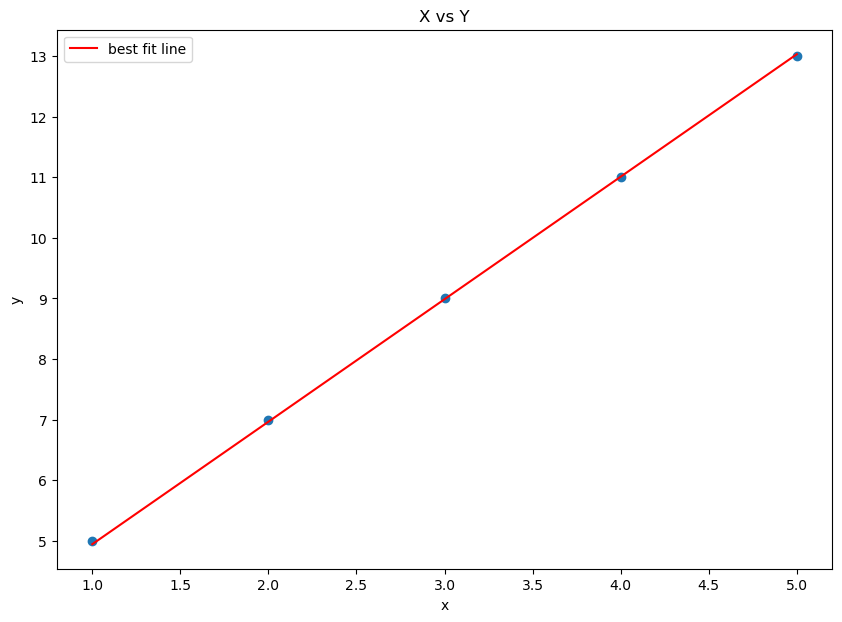

In [101]:
#plot the figure with the data points and the best fit line
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.title('X vs Y')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,m*x + b,'r',label = 'best fit line')
plt.legend()

Find the values to build a system of simulteneous equations

In [95]:
sum_xi_squared,sum_xi,sum_yi,sum_xi_yi,n_b = np.sum(x*x),np.sum(x),np.sum(y),np.sum(x*y),len(x) 
sum_xi_squared,sum_xi,sum_yi,sum_xi_yi,n_b

(55, 15, 45, 155, 5)

Equating the dC/dm and dC/db to zero, we get the following equations by rearranging the terms

$$
\sum_{i=0}^{n} (x_i y_i) = \sum_{i=0}^{n} (m x_i^2) + \sum_{i=0}^{n} (b x_i)
$$

$$
\sum_{i=0}^{n} (y_i) = \sum_{i=0}^{n} (m x_i) + \sum_{i=0}^{n} (b)
$$


In [102]:
#solving the gradient descent equations using numpy

# Coefficient matrix (A)
A = np.array([[sum_xi_squared, sum_xi], [sum_xi, n_b]])

# Constants vector (B)
B = np.array([sum_xi_yi, sum_yi])

# Solve the system of equations
solution = np.linalg.solve(A, B)

print('Slope : {}, Y-Intercept : {}'.format(solution[0],solution[1]))

Slope : 1.9999999999999982, Y-Intercept : 3.0000000000000067


In [100]:
print('Slope from Gradient Descent : {}, Y-Intercept from Gradient Descent : {}'.format(m,b))

Slope from Gradient Descent : 2.021281045682893, Y-Intercept from Gradient Descent : 2.923168672645527


If the gradient descent is continued for different learning rates and different number of iterations, it is possible to get a more accurate answer

In [117]:
def gradient_descent_plot(x,y):
    m_curr = b_curr = 0
    n = len(x)
    lr = 0.01
    iterations = 500
    
    plt.figure(figsize=(10,7))
    plt.title('Visualization of Gradient Descent in Action from Zero Slope')
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(iterations):
        cost_function = np.sum(y-(m_curr*x + b_curr))/n
        d_dm = np.sum((-2/n)*x*(y-(m_curr*x + b_curr)))
        d_db = np.sum((-2/n)*(y-(m_curr*x + b_curr)))
        plt.plot(x,m_curr*x+b_curr)
        m_curr = m_curr - lr*d_dm
        b_curr = b_curr - lr*d_db
    

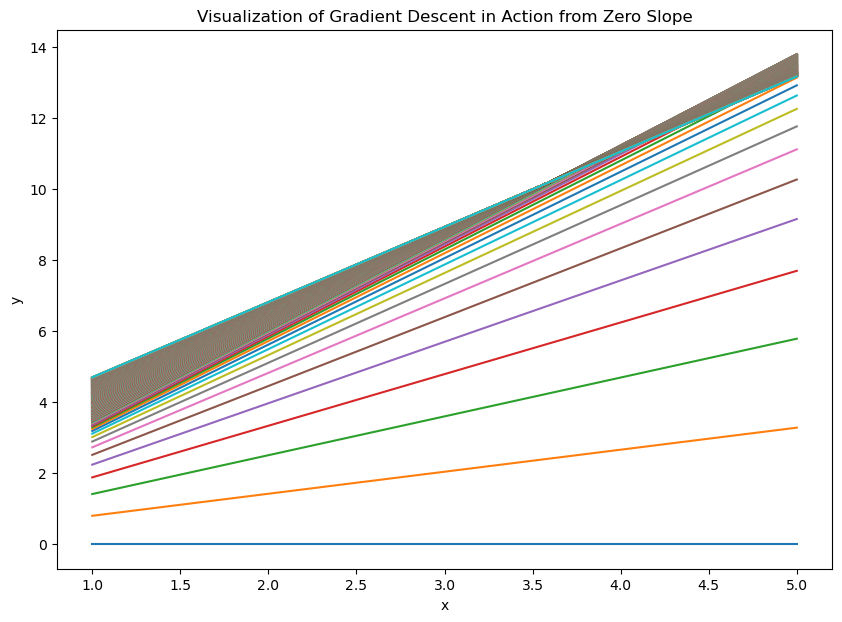

In [118]:
gradient_descent_plot(x,y)